In [1]:
import pathlib

path_root = pathlib.Path('./')
path_imgs = pathlib.Path('./processed_images')

#Exibir imagens do dataset

In [2]:
import skimage as ski
from matplotlib import pyplot as pl
import numpy as np

imgs = []
items = []
for folder in path_imgs.iterdir():
  for item in folder.iterdir():
    items.append(item)

items = sorted(items)

for item in items:
    img = ski.io.imread(item)
    imgs.append(img)

In [3]:
mont_capacitores = ski.util.montage(imgs[0:4], channel_axis=-1, grid_shape=(1, 4))
mont_diodo = ski.util.montage(imgs[20:24], channel_axis=-1, grid_shape=(1, 4))
mont_indutor = ski.util.montage(imgs[40:44], channel_axis=-1, grid_shape=(1, 4))
mont_ic = ski.util.montage(imgs[60:64], channel_axis=-1, grid_shape=(1, 4))
mont_jump = ski.util.montage(imgs[80:84], channel_axis=-1, grid_shape=(1, 4))
mont_led = ski.util.montage(imgs[100:104], channel_axis=-1, grid_shape=(1, 4))
mont_pot = ski.util.montage(imgs[120:124], channel_axis=-1, grid_shape=(1, 4))
mont_resistores = ski.util.montage(imgs[140:144], channel_axis=-1, grid_shape=(1, 4))
mont_switch = ski.util.montage(imgs[160:164], channel_axis=-1, grid_shape=(1, 4))
mont_transist = ski.util.montage(imgs[180:184], channel_axis=-1, grid_shape=(1, 4))

In [ ]:
fig, axes = pl.subplots(10, 1, figsize=(40.96,20.48))

ordem = [mont_capacitores, mont_pot, mont_led, mont_diodo, mont_resistores, mont_ic, mont_transist, mont_switch, mont_indutor, mont_jump]
nomes = ['Capacitor', 'Potenciometro', 'Led', 'Diodo', 'Resistor', 'CI', 'Transistor', 'Switch', 'Indutor', 'Jumper']
for i, mont in zip(range(0,10), ordem):
  axes[i].imshow(mont)
  axes[i].set_axis_off()
  axes[i].set_title(nomes[i])


In [ ]:
import cv2
from cv2 import filter2D
import numpy as np 
import matplotlib.pyplot as plt 

image = imgs[125]


c = 255 / np.log(1 + np.max(image)) 
log_image = c * (np.log(image + 1)) 
inverse_log_image = (np.exp(image / c) - 1)
   
log_image = np.array(log_image, dtype = np.uint8) 
inverse_log_image = np.array(inverse_log_image, dtype = np.uint8) 
mean_image = image.copy()

N = 9
kernel = np.ones(N)/(N)
kernel = np.reshape(kernel, (3, 3))  
print(kernel)

mean_image = cv2.filter2D(image, ddepth=-1, kernel=kernel)

mont_log = ski.util.montage([image, log_image], channel_axis=-1, grid_shape=(1, 2))
mont_exp = ski.util.montage([image, inverse_log_image], channel_axis=-1, grid_shape=(1, 2))
mont_mean = ski.util.montage([image, mean_image], channel_axis=-1, grid_shape=(1, 2))

plt.imshow(mont_log)
plt.axis('off')
plt.show() 

plt.imshow(mont_exp)
plt.axis('off')
plt.show() 

plt.imshow(mont_mean)
plt.axis('off')
plt.show() 

In [ ]:
import cv2
from cv2 import filter2D
import numpy as np 
import matplotlib.pyplot as plt 

N = 9
kernel = np.ones(N)/(N)
kernel = np.reshape(kernel, (3, 3))  

log_imgs = []
exp_imgs = []
mean_imgs = []

for image in imgs:
    c = 255 / np.log(1 + np.max(image)) 
    log_image = c * (np.log(image + 1)) 
    exp_image = (np.exp(image / c) - 1)
    
    log_image = np.array(log_image, dtype = np.uint8) 
    exp_image = np.array(exp_image, dtype = np.uint8) 
    mean_image = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    
    log_imgs.append(log_image)
    exp_imgs.append(exp_image)
    mean_imgs.append(mean_image)

C:\Users\Augusto Barth\AppData\Local\Temp\ipykernel_17352\3840450648.py:16: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(image + 1))
C:\Users\Augusto Barth\AppData\Local\Temp\ipykernel_17352\3840450648.py:19: RuntimeWarning: invalid value encountered in cast
  log_image = np.array(log_image, dtype = np.uint8)


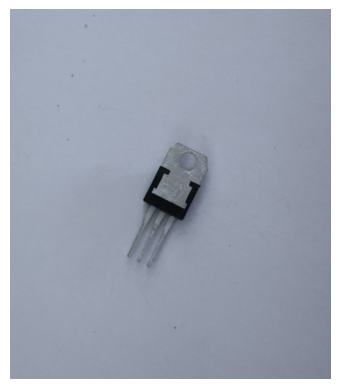

In [ ]:
plt.imshow(mean_imgs[199])
plt.axis('off')
plt.show() 

In [ ]:
# import os

# im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
# cv2.imwrite(os.path.join('augmented_dataset', name[:-3]+'png'), im)